In [6]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
news_data = pd.read_csv("../data/raw_analyst_ratings.csv")

In [21]:
print(news_data.head(7))

print(news_data.dtypes)

print(news_data.info())

print(news_data.describe())

print(news_data.isna().sum())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   
5           5  CFRA Maintains Hold on Agilent Technologies, L...   
6           6  UBS Maintains Neutral on Agilent Technologies,...   

                                                 url                publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...        Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...        Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...               Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...               Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b.

In [9]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

news_data["Sentiment"] = news_data["headline"].apply(get_sentiment)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: Sentiment, dtype: float64
5133
count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Sentiment, dtype: float64
Sentiment
0.000000    934928
0.500000     86313
0.250000     31492
0.136364     16654
0.100000     15469
Name: count, dtype: int64
                                               headline  Sentiment
819            Best Buy: Analysts' Upgrades, Downgrades        1.0
1343    OneMove(TM) Records its Best Month Ever in July        1.0
1382  Klondike Silver Completes Underground Drilling...        1.0
1849                             10 Best Stocks Of 2017        1.0
2270          Miners: The Best Way To Play A Rate Hike?        1.0
                                               headline  Sentiment
2552  Tech, Semiconductors Among Worst Performers As...       -1.0
3175               I've j

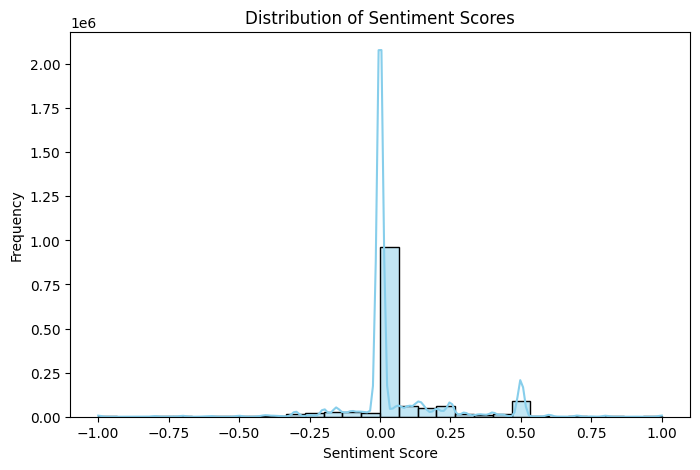

In [15]:
print(news_data["Sentiment"].head(7))

print(news_data["Sentiment"].nunique())

print(news_data["Sentiment"].describe())

print(news_data["Sentiment"].value_counts().head())

print(news_data[["headline", "Sentiment"]].nlargest(5, "Sentiment"))

print(news_data[["headline", "Sentiment"]].nsmallest(5, "Sentiment"))

plt.figure(figsize=(8, 5))
sns.histplot(news_data['Sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


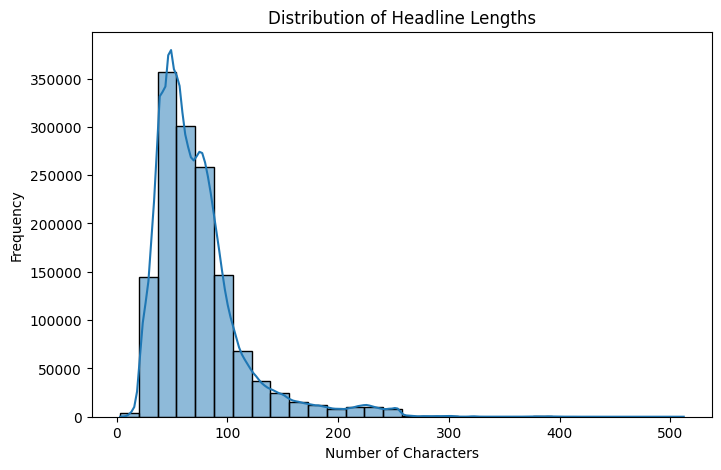

In [16]:
# Add a column for headline lengths
news_data['headline_length'] = news_data['headline'].apply(len)

# Basic statistics
print(news_data['headline_length'].describe())

# Optional: Visualize headline length distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(news_data['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Publisher counts
publisher_counts = news_data['publisher'].value_counts()

# Top publishers
top_publishers = publisher_counts.head(10)
print(top_publishers)



publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [ ]:
#Text analysis  (Topic modelling)

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to get common words
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # top 20 keywords
X = vectorizer.fit_transform(news_data['headline'])

# Get keywords
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", keywords)


Top Keywords: ['announces' 'benzinga' 'buy' 'downgrades' 'earnings' 'eps' 'est' 'market'
 'mid' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'trading'
 'update' 'vs' 'week']
